<p><strong>Supplier: </strong>ABC Corp #12345&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>QIS # </strong>Control # 1234

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<strong>Click </strong><a href="javascript:code_toggle()"><strong>here</strong></a> to hide/unhide code used to generate the plots.''')

<center><h1>Model XXX System Damaged</h1></center>
<center><h3>Created by John Doe</h3></center>
<center><h3>9/28/20</h3></center>

### Affected Vehicles / Trim Levels / Failed Part Numbers:

- 2012 through 2016 Model XXX, all trim levels, part # 12345

### Market Problem Description / Dealer Repair Method:

Customers experience...

### Root Cause:

Supplier messed up.

### Countermeasure Activity:

- C/M #1 implemented:
    - Supplier fixed problem

### Warranty Summary:

In [2]:
from altair import *

In [95]:
import pandas as pd
import numpy as np

df = pd.read_clipboard()
df.reset_index(level=0, inplace=True)

# To use Altair, data must be in long format
data = pd.melt(df, id_vars=['index']).dropna()
data.value = data.value.map(lambda x: x.replace('%','')).astype(np.float)
data.columns = ['MFSS','MODEL_YR','DEFECT_RATE']

**Cumulative Defect Rate vs Months Since Start of Sales (MFSS)**

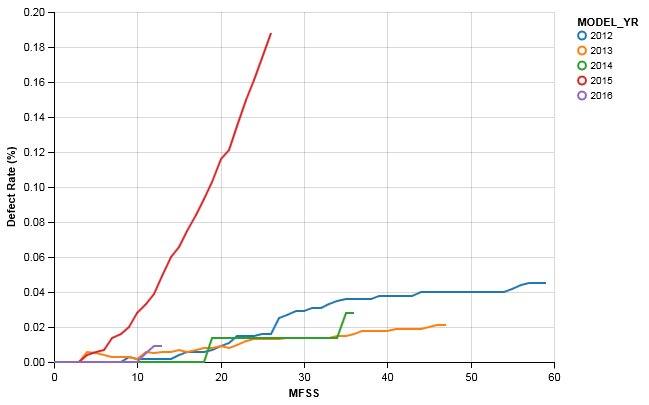

In [108]:
Chart(data).mark_line().encode(
    x='MFSS:Q',
    y=Y('DEFECT_RATE', axis=Axis(format=".2f", title='Defect Rate (%)')),
    color='MODEL_YR'
)

**Defect Rate versus Vehicle Build Month**

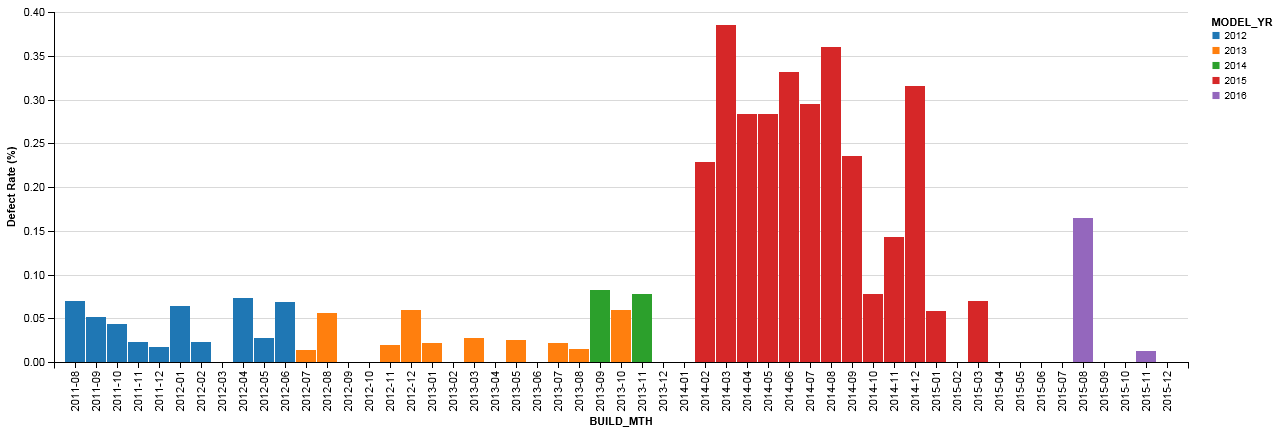

In [119]:
df = pd.read_clipboard()

# To use Altair, data must be in long format
data = pd.melt(df, id_vars=['BUILD_MTH']).dropna()
data.value = data.value.map(lambda x: x.replace('%','')).astype(np.float)
data.columns = ['BUILD_MTH','MODEL_YR','DEFECT_RATE']

Chart(data).mark_bar().encode(
    x='BUILD_MTH',
    y=Y('DEFECT_RATE', axis=Axis(format=".2f", title='Defect Rate (%)')),
    color='MODEL_YR'
)

### Supplier Percent Responsibility:

Based on past warranty trend, supplier's percent responsibility will be 92.38%.

### Initial Warranty Cost Reimbursement:

- HM has currently already paid **&#36;124,403.04**
- Dept X has determined the supplier's initial reimbursement amount to be **&#36;114,923.53:**
    - Total number of claims through end of August 2016: 144
    - [(part cost) + (labor cost) + (handling cost)] x (# of claims) x (% supplier responsibility)
    - (384.88 + 231 + 248.03) x 144 x 92.38% = **&#36;114,923.53**

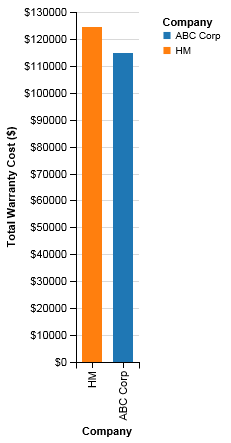

In [4]:
data = pd.read_clipboard()

data['Amount'] = data['Amount'].map(lambda x: x.replace('$','').replace(',','')).astype(np.float)
data.columns = ['Company','Amount']

Chart(data).mark_bar().encode(
    y=Y('Amount', axis=Axis(format="$f", title='Total Warranty Cost ($)')),
    x=X('Company', sort=SortField(field='Amount', order='descending', op='sum')),
    #x='Company',
    color='Company'
)